## Numerical Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
import yaml
import sys
import os
%matplotlib inline

In [2]:
# get data for visualization
def getAllData(path):
    data = []
    for i in range(1,11):
        data.append(yaml.safe_load(open(os.path.join(path,"".join(("File"+str(i),'.yaml'))))))
    return data

In [3]:
# Collect CPU data for visualization
def getData(path):
    data = []
    cpu = []
    for i in range(1,8):
        data.append(yaml.safe_load(open(os.path.join(path,"".join(("AB"+str(i),'.yaml'))))))
        if(data[i-1]['placement']['alloc_node_res'][2]['name'] != 'vnf_user'):
            cpu.append(data[i-1]['placement']['alloc_node_res'][2]['cpu'])
        else:
            cpu.append(data[i-1]['placement']['alloc_node_res'][1]['cpu'])
    return cpu

In [4]:
# Collect placement data
def getPlacementData(path):
    data = []
    placement = []
    for i in range(1,8):
        data.append(yaml.safe_load(open(os.path.join(path,"".join(("AB"+str(i),'.yaml'))))))
        placement.append(data[i-1]['placement']['vnfs'][0]['name']+":"+data[i-1]['placement']['vnfs'][0]['node'])
        placement.append(data[i-1]['placement']['vnfs'][1]['name']+":"+data[i-1]['placement']['vnfs'][1]['node'])
        placement.append(data[i-1]['placement']['vnfs'][2]['name']+":"+data[i-1]['placement']['vnfs'][2]['node'])
    return placement

In [13]:
#data
groundTruth = []
linear = []
xgb = []
rf = []
gradient = []
ridge = []
svm = []

# Placement vars
CPU_groundTruth = []
CPU_linear = []
CPU_xgboost = []
CPU_rf = []
CPU_gradient = []
CPU_ridge = []
CPU_svm = []

inv = getAllData('Analysis/Abilene/fw1chain/inv')
xgb = getAllData('Analysis/Abilene/fw1chain/XGB')
linear = getAllData('Analysis/Abilene/fw1chain/Linear')
rf = getAllData('Analysis/Abilene/fw1chain/rf')
nodes = [1,2,3,4,5,6,7,8,9,10] 
models = [CPU_groundTruth,CPU_linear,CPU_xgboost,CPU_rf]
datasets = [inv,linear,xgb,rf]
totalCPU = 0.0



for m in range(0,len(models)):
    for i in range(0,10):
        #print("\nFile",i+1,"\n")
        totalCPU = 0
        for j in range(0,len(datasets[m][i]['placement']['alloc_node_res'])):
            #print(datasets[m][i]['placement']['alloc_node_res'][j])
            totalCPU += datasets[m][i]['placement']['alloc_node_res'][j]['cpu']
        models[m].append(totalCPU)    
        #print(totalCPU)


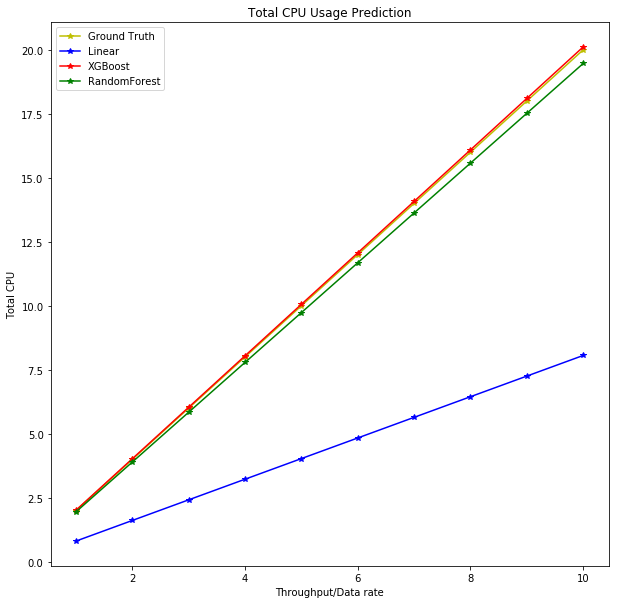

In [15]:
# plots

modelProperties = [{"name":"Ground Truth","color": "y"},{"name":"Linear","color":"b"},{"name":"XGBoost","color":"r"},{"name":"RandomForest","color":"g"}]

fig = plt.figure(figsize=(10, 10))

for i in range(0,len(models)):
    plt.plot(nodes, models[i], color=modelProperties[i]["color"], marker="*", label=modelProperties[i]["name"])


plt.xlabel('Throughput/Data rate')
plt.ylabel('Total CPU')
plt.title('Total CPU Usage Prediction')
plt.legend()
plt.show()

In [20]:

# CPU rate vars
default = []
groundTruth = []
linear = []
xgboost = []
randomForest = []
gradient = []
ridge = []
svm = []

# Placement vars
P_default = []
P_groundTruth = []
P_linear = []
P_xgboost = []
P_randomForest = []
P_gradient = []
P_ridge = []
P_svm = []

dataRate = [50, 100, 150, 200, 250, 300, 350] # Input data rate

# get predicted CPU data
groundTruth = getData('DataForVis/inv')
linear = getData('DataForVis/linear')
xgboost = getData('DataForVis/xgb')
gradient = getData('DataForVis/gb')
svm = getData('DataForVis/svm')
ridge = getData('DataForVis/ridge')
randomForest = getData('DataForVis/ridge')


# get placement data
P_groundTruth = getPlacementData('DataForVis/inv')
P_linear = getPlacementData('DataForVis/linear')
P_xgboost = getPlacementData('DataForVis/xgb')
P_gradient = getPlacementData('DataForVis/gb')
P_svm = getPlacementData('DataForVis/svm')
P_ridge = getPlacementData('DataForVis/ridge')
P_randomForest = getPlacementData('DataForVis/ridge')


# Print data rates
print("-------------CPU Info--------------\n")

for i in range(0,7):
    print("------------DATA RATE:",dataRate[i],"---------------\n")
    print("Ground Truth:", groundTruth[i],"\n")
    print("Linear:", linear[i],"\n")
    print("XGBoost:", xgboost[i],"\n")
    print("Gradient Boost:", gradient[i],"\n")
    print("Ridge:", ridge[i],"\n")
    print("Random Forest:", randomForest[i],"\n")
    print("SVM:", svm[i],"\n")

    
# Print Placement Info  
print("-------------Placement Info--------------\n")

for i in range(0,7):
    print("------------DATA RATE:",dataRate[i],"---------------\n")
    i *= 3
    print("Ground Truth:", P_groundTruth[i],P_groundTruth[i+1],P_groundTruth[i+2],"\n")
    print("Linear:", P_linear[i],P_linear[i+1],P_linear[i+2],"\n")
    print("XGBoost:", P_xgboost[i], P_xgboost[i+1], P_xgboost[i+2],"\n")
    print("Gradient Boost:", P_gradient[i],P_gradient[i+1],P_gradient[i+2],"\n")
    print("Ridge:", P_ridge[i],P_ridge[i+1],P_ridge[i+2],"\n")
    print("Random Forest:", P_randomForest[i],P_randomForest[i+1],P_randomForest[i+2],"\n")
    print("SVM:", P_svm[i],P_svm[i+1],P_svm[i+2],"\n")
    print(i, i+1, i+2)

    


-------------CPU Info--------------

------------DATA RATE: 50 ---------------

Ground Truth: 0.41421356237309515 

Linear: -1.21662461531336 

XGBoost: 0.3621653914451599 

Gradient Boost: 0.3942723507880016 

Ridge: -2.496638117982186 

Random Forest: -2.496638117982186 

SVM: 0.09543347233223741 

------------DATA RATE: 100 ---------------

Ground Truth: 1.0 

Linear: 0.40295717574236534 

XGBoost: 1.005721926689148 

Gradient Boost: 0.985586155606764 

Ridge: -2.173300868596307 

Random Forest: -2.173300868596307 

SVM: 0.6710954610613001 

------------DATA RATE: 150 ---------------

Ground Truth: 1.8284271247461903 

Linear: 2.0225389667980904 

XGBoost: 1.7609204053878784 

Gradient Boost: 1.774979566476715 

Ridge: -1.8499636405421775 

Random Forest: -1.8499636405421775 

SVM: 1.6333025159979184 

------------DATA RATE: 200 ---------------

Ground Truth: 3.0 

Linear: 3.6421210997731137 

XGBoost: 2.8533294200897217 

Gradient Boost: 2.8560010506807094 

Ridge: -1.5266263698245

## Visualization
##### Some nice plots

In [ ]:
# data rate vs CPU
fig = plt.figure(figsize=(18, 18))

plt.plot(dataRate, linear, color='y', marker="*", markersize=15, label="Linear Regression")
plt.plot(dataRate, groundTruth, color='orange', marker=".", markersize=15, label="Ground Truth")
plt.plot(dataRate, xgboost, color='b',marker="^", markersize=15, label="XGBoost")
plt.plot(dataRate, gradient, color='r',marker="+", markersize=15, label="Gradient Boost")
plt.plot(dataRate, svm, color='magenta',marker="p", markersize=15, label="SVM")





plt.xlabel('Throughput/Data rate')
plt.ylabel('CPU')
plt.title('CPU prediction')
plt.legend()
plt.show()

In [ ]:
# data rate vs CPU
fig = plt.figure(figsize=(18, 18))

plt.plot(dataRate, linear, color='y', marker="*", markersize=15, label="Linear Regression")
plt.plot(dataRate, groundTruth, color='orange', marker=".", markersize=15, label="Ground Truth")
plt.plot(dataRate, xgboost, color='b',marker="^", markersize=15, label="XGBoost")
plt.plot(dataRate, gradient, color='r',marker="+", markersize=15, label="Gradient Boost")
plt.plot(dataRate, svm, color='magenta',marker="p", markersize=15, label="SVM")
plt.plot(dataRate, ridge, color='violet',marker="P", markersize=15, label="Ridge")
plt.plot(dataRate, randomForest, color='green',marker="d", markersize=15, label="Random Forest")


plt.xlabel('Throughput/Data rate')
plt.ylabel('CPU')
plt.title('CPU prediction')
plt.legend()
plt.show()